In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
#Loading the dataset
dataset =pd.read_csv("adani.csv")

In [3]:
dataset.head()

,date,open,high,low,close,volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,1612972


In [4]:
#to_datetime function for converting "date" object data type into datetime data type
dataset['date']= pd.to_datetime(dataset['date'], infer_datetime_format=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    669 non-null    datetime64[ns]
 1   open    669 non-null    float64       
 2   high    669 non-null    float64       
 3   low     669 non-null    float64       
 4   close   669 non-null    float64       
 5   volume  669 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 31.5 KB


In [6]:
#setting data column as a index
dataset.set_index('date')

,open,high,low,close,volume
date,,,,,
2018-06-18,30.000000,31.500000,28.500000,31.500000,7006229
2018-06-19,32.700001,33.049999,31.000000,32.599998,2895692
2018-06-20,31.500000,32.200001,31.000000,31.000000,1115553
2018-06-21,29.450001,30.000000,29.450001,29.650000,2854524
2018-06-22,28.200001,29.799999,28.200001,29.450001,1612972
...,...,...,...,...,...
2021-03-01,1170.000000,1170.000000,1130.150024,1141.000000,448402
2021-03-02,1155.000000,1175.000000,1134.000000,1164.849976,521226
2021-03-03,1178.900024,1190.000000,1162.050049,1176.300049,494659


In [11]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

# Additive Decomposition

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Text(0, 0.5, 'Residual')

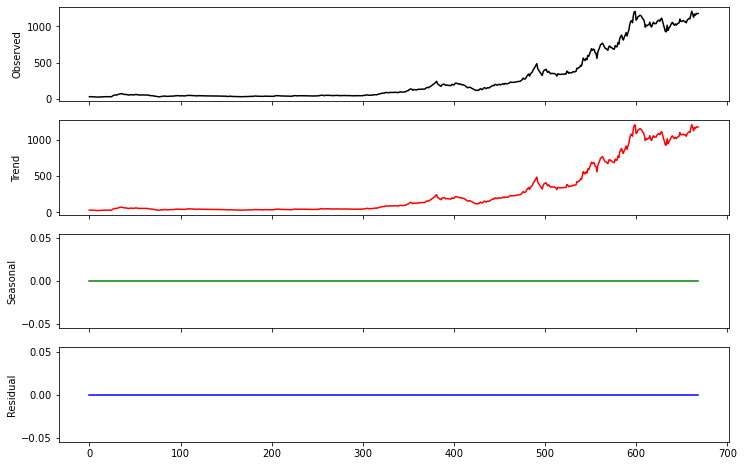

In [35]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(dataset['open'], model='additive', period=1)
 
fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], legend=False, color='k')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='r')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='g')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='b')
axes[3].set_ylabel('Residual')

We can see that the entire series was taken as the trend component and that there was no seasonality.

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

# Multiplicative Decomposition

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

Text(0, 0.5, 'Residual')

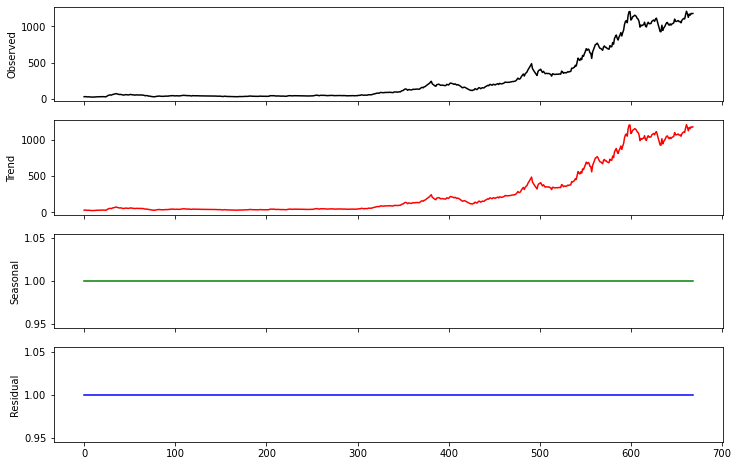

In [41]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(dataset['open'], model='multiplicative', period=1)

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], legend=False, color='k')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='r')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='g')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='b')
axes[3].set_ylabel('Residual')